In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ATTRITION.csv')
df.head(5)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,Single,1420,Upto 5k,25233,1,Y,No,13,3,3
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,Single,1200,Upto 5k,9724,1,Y,No,12,3,1
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,Single,1051,Upto 5k,13493,1,Y,No,15,3,4
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,Single,1904,Upto 5k,13556,1,Y,No,12,3,4


In [3]:
df.shape

(1480, 29)

## <span style="color:#808080;"><u>__Data Checks to Perform__</u></span>
-  Check the missing values
-  Check number of unique values in each column 
-  Check the dublicate rows
-  Check statistics of numerical column
-  Check different categories present in each categorical column


##### <span style="color:grey">__1. Missing Values__</span>

In [4]:
df.isnull().sum()

EmpID                       0
Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
dtype: int64

**There is no missing values in dataset**

##### <span style="color:grey">__2. Unique Values in each Column__</span>

In [5]:
df.nunique()

EmpID                       1470
Age                           43
AgeGroup                       5
Attrition                      2
BusinessTravel                 4
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
SalarySlab                     4
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
dtype: int64

**Removing column having only 1 unique value**

In [6]:
df = df.drop(columns=['EmployeeCount','Over18'])
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,Single,1420,Upto 5k,25233,1,No,13,3,3
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,3,Single,1200,Upto 5k,9724,1,No,12,3,1
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,2,Single,1878,Upto 5k,8059,1,Yes,14,3,4
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,Single,1051,Upto 5k,13493,1,No,15,3,4
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,3,Single,1904,Upto 5k,13556,1,No,12,3,4


##### <span style="color:grey">__3. Dublicate Rows__</span>

In [7]:
df.duplicated().sum()

np.int64(10)

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

##### <span style="color:grey">__4. Statistics of numerical columns__</span>

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0


##### <span style="color:grey">__5. Categorical Columns and Numerical Columns__</span>

In [10]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

# Printing columns 
print('We have {} numerical features : \n{}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : \n{}'.format(len(categorical_features), categorical_features))


We have 16 numerical features : 
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction']

We have 11 categorical features : 
['EmpID', 'AgeGroup', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'SalarySlab', 'OverTime']


In [11]:
df.head().T

,0,1,2,3,4
EmpID,RM297,RM302,RM458,RM728,RM829
Age,18,18,18,18,18
AgeGroup,18-25,18-25,18-25,18-25,18-25
Attrition,Yes,No,Yes,No,Yes
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Frequently,Non-Travel,Non-Travel
DailyRate,230,812,1306,287,247
Department,Research & Development,Sales,Sales,Research & Development,Research & Development
DistanceFromHome,3,10,5,5,8
Education,3,3,3,2,1
EducationField,Life Sciences,Medical,Marketing,Life Sciences,Medical


## <span style="color:#808080;"><u>__Exploratory Data Analysis__</u></span>

### <span style="color:#808080;"><u>__Gender Specific Analysis__</u></span>

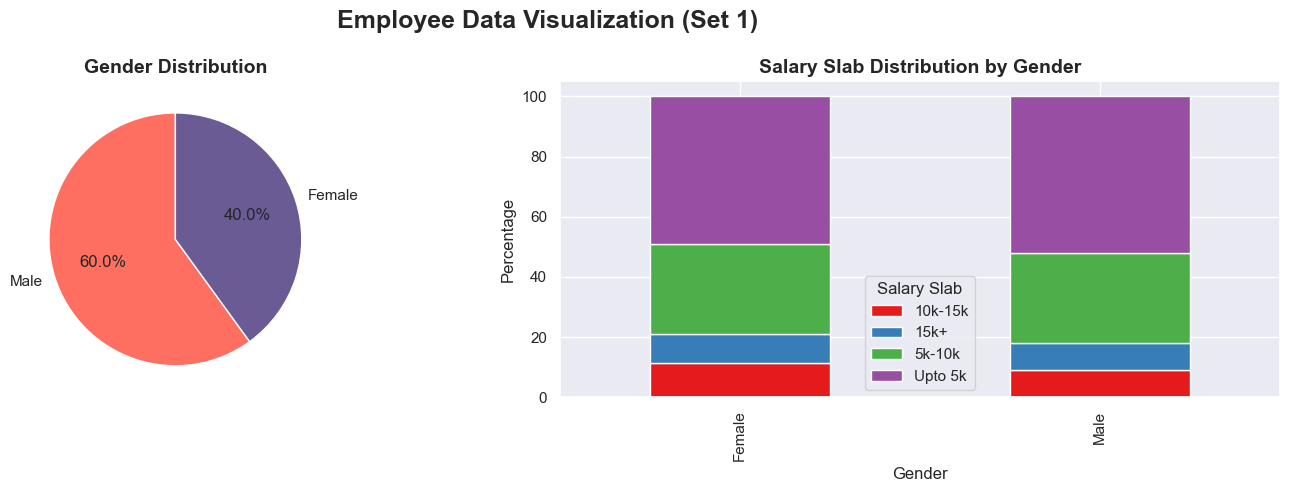

🟢 Men have Higher Attrition Rate than Women.
🔴 Women are mostly in Lower Salary Slabs.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Insight Function
def generate_insights(df):
    insights = []

    if df[df['Gender'] == 'Female']['Attrition'].value_counts(normalize=True).get('Yes', 0) > \
       df[df['Gender'] == 'Male']['Attrition'].value_counts(normalize=True).get('Yes', 0):
        insights.append("🔴 Women have Higher Attrition Rate than Men.")
    else:
        insights.append("🟢 Men have Higher Attrition Rate than Women.")

    if df[df['Gender'] == 'Female']['SalarySlab'].value_counts(normalize=True).idxmax() == 'Upto 5k':
        insights.append("🔴 Women are mostly in Lower Salary Slabs.")
    else:
        insights.append("🟢 Men are mostly in Higher Salary Slabs.")

    return insights

# Creating Subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Employee Data Visualization (Set 1)", fontsize=18, fontweight='bold')

# 1. Gender Distribution Pie Chart
gender_counts = df['Gender'].value_counts()
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#FF6F61', '#6B5B95'], startangle=90)
axes[0].set_title('Gender Distribution', fontsize=14, fontweight='bold')

# 2. Salary Slab Distribution by Gender
crosstab = pd.crosstab(df['Gender'], df['SalarySlab'], normalize='index') * 100
crosstab.plot(kind='bar', stacked=True, ax=axes[1], color=sns.color_palette('Set1', len(crosstab.columns)))
axes[1].set_title('Salary Slab Distribution by Gender', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Percentage')
axes[1].legend(title='Salary Slab')

plt.tight_layout()
plt.show()

# Print Insights
insights = generate_insights(df)
for insight in insights:
    print(insight)


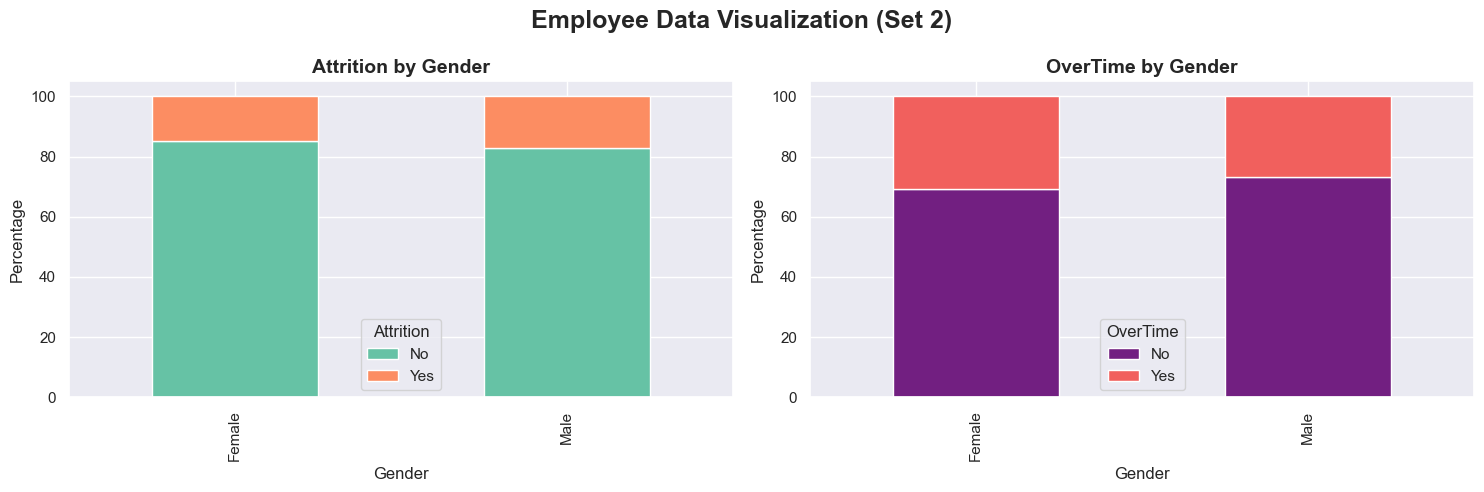

🔴 Women do more Overtime.
🟢 Men are more Satisfied than Women.


In [26]:
# Function to Generate Insights
def generate_insights_2(df):
    insights = []

    if df[df['Gender'] == 'Female']['OverTime'].value_counts(normalize=True).get('Yes', 0) > \
       df[df['Gender'] == 'Male']['OverTime'].value_counts(normalize=True).get('Yes', 0):
        insights.append("🔴 Women do more Overtime.")
    else:
        insights.append("🟢 Men do more Overtime.")

    if df[df['Gender'] == 'Female']['JobSatisfaction'].mean() > df[df['Gender'] == 'Male']['JobSatisfaction'].mean():
        insights.append("🔴 Women are more Satisfied than Men.")
    else:
        insights.append("🟢 Men are more Satisfied than Women.")

    return insights

# Creating Subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Employee Data Visualization (Set 2)", fontsize=18, fontweight='bold')

# 3. Attrition by Gender
crosstab = pd.crosstab(df['Gender'], df['Attrition'], normalize='index') * 100
crosstab.plot(kind='bar', stacked=True, ax=axes[0], color=sns.color_palette('Set2', len(crosstab.columns)))
axes[0].set_title('Attrition by Gender', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Percentage')
axes[0].legend(title='Attrition')

# 4. Overtime by Gender
crosstab = pd.crosstab(df['Gender'], df['OverTime'], normalize='index') * 100
crosstab.plot(kind='bar', stacked=True, ax=axes[1], color=sns.color_palette('magma', len(crosstab.columns)))
axes[1].set_title('OverTime by Gender', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Percentage')
axes[1].legend(title='OverTime')

plt.tight_layout()
plt.show()

# Print Insights
insights = generate_insights_2(df)
for insight in insights:
    print(insight)


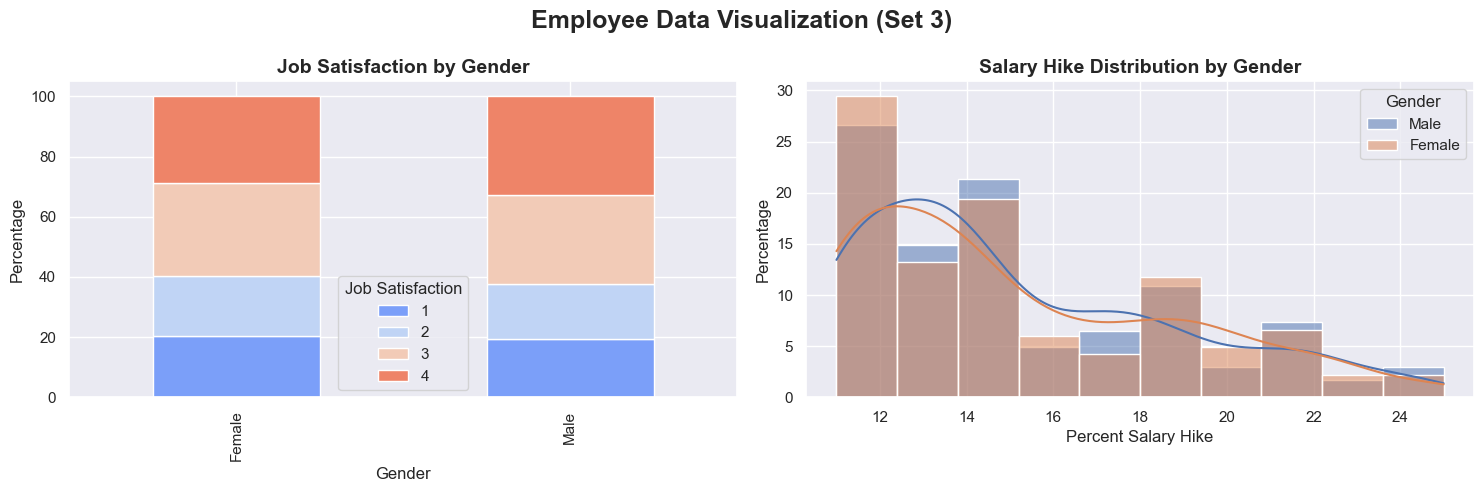

🟢 Men have higher Job Involvement than Women.
🟢 Men get more Salary Hike on average.


In [27]:
# Function to Generate Insights
def generate_insights_3(df):
    insights = []

    if df[df['Gender'] == 'Female']['JobInvolvement'].mean() > df[df['Gender'] == 'Male']['JobInvolvement'].mean():
        insights.append("🔴 Women have higher Job Involvement than Men.")
    else:
        insights.append("🟢 Men have higher Job Involvement than Women.")

    if df[df['Gender'] == 'Female']['PercentSalaryHike'].mean() > df[df['Gender'] == 'Male']['PercentSalaryHike'].mean():
        insights.append("🔴 Women get more Salary Hike on average.")
    else:
        insights.append("🟢 Men get more Salary Hike on average.")

    return insights

# Creating Subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Employee Data Visualization (Set 3)", fontsize=18, fontweight='bold')

# 5. Job Satisfaction by Gender
crosstab = pd.crosstab(df['Gender'], df['JobSatisfaction'], normalize='index') * 100
crosstab.plot(kind='bar', stacked=True, ax=axes[0], color=sns.color_palette('coolwarm', len(crosstab.columns)))
axes[0].set_title('Job Satisfaction by Gender', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Percentage')
axes[0].legend(title='Job Satisfaction')

# 6. Salary Hike Histogram
for gender in df['Gender'].unique():
    subset = df[df['Gender'] == gender]
    sns.histplot(subset['PercentSalaryHike'], bins=10, kde=True, ax=axes[1], label=gender, stat='percent')
axes[1].set_title('Salary Hike Distribution by Gender', fontsize=14, fontweight='bold')
axes[1].legend(title='Gender')
axes[1].set_xlabel('Percent Salary Hike')
axes[1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

# Print Insights
insights = generate_insights_3(df)
for insight in insights:
    print(insight)


### <span style="color:#808080;"><u>__Attrition Specific Analysis__</u></span>

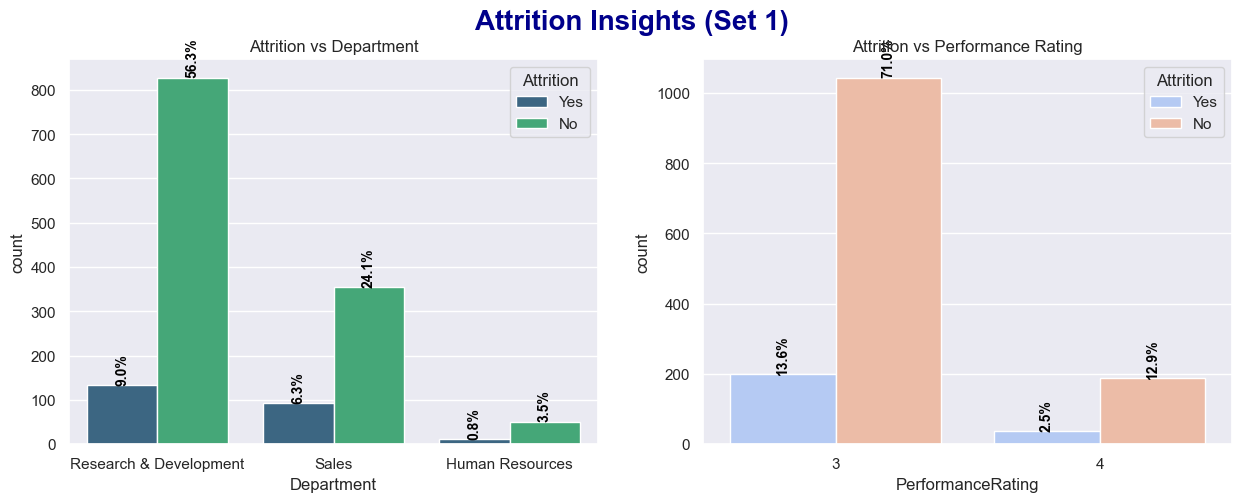

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def add_percentage(ax, total):
    for p in ax.patches:
        if p.get_height() > 0:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            ax.annotate(percentage,
                        (p.get_x() + p.get_width() / 2, p.get_height() + 0.2),
                        ha='center', va='bottom', fontsize=10, fontweight='bold', color='black', rotation=90)

def plot_attrition_insights_1(df):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle("Attrition Insights (Set 1)", fontsize=20, fontweight='bold', color='darkblue')
    
    ax = sns.countplot(data=df, x='Department', hue='Attrition', palette='viridis', ax=axes[0])
    axes[0].set_title("Attrition vs Department")
    add_percentage(ax, len(df))
    
    ax = sns.countplot(data=df, x='PerformanceRating', hue='Attrition', palette='coolwarm', ax=axes[1])
    axes[1].set_title("Attrition vs Performance Rating")
    add_percentage(ax, len(df))
    
    plt.show()

plot_attrition_insights_1(df)


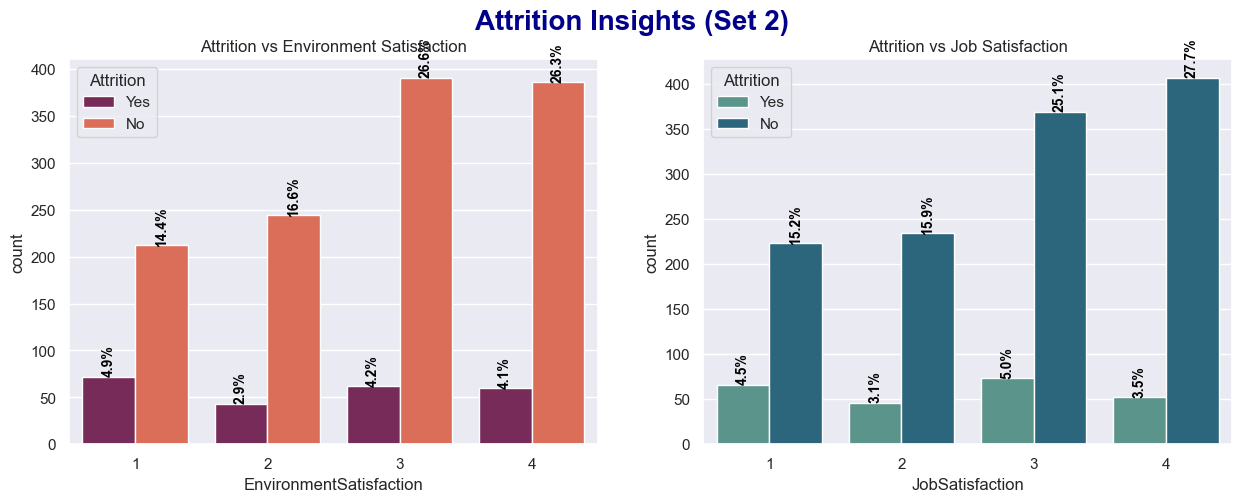

In [21]:
def plot_attrition_insights_2(df):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle("Attrition Insights (Set 2)", fontsize=20, fontweight='bold', color='darkblue')
    
    ax = sns.countplot(data=df, x='EnvironmentSatisfaction', hue='Attrition', palette='rocket', ax=axes[0])
    axes[0].set_title("Attrition vs Environment Satisfaction")
    add_percentage(ax, len(df))
    
    ax = sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='crest', ax=axes[1])
    axes[1].set_title("Attrition vs Job Satisfaction")
    add_percentage(ax, len(df))
    
    plt.show()

plot_attrition_insights_2(df)


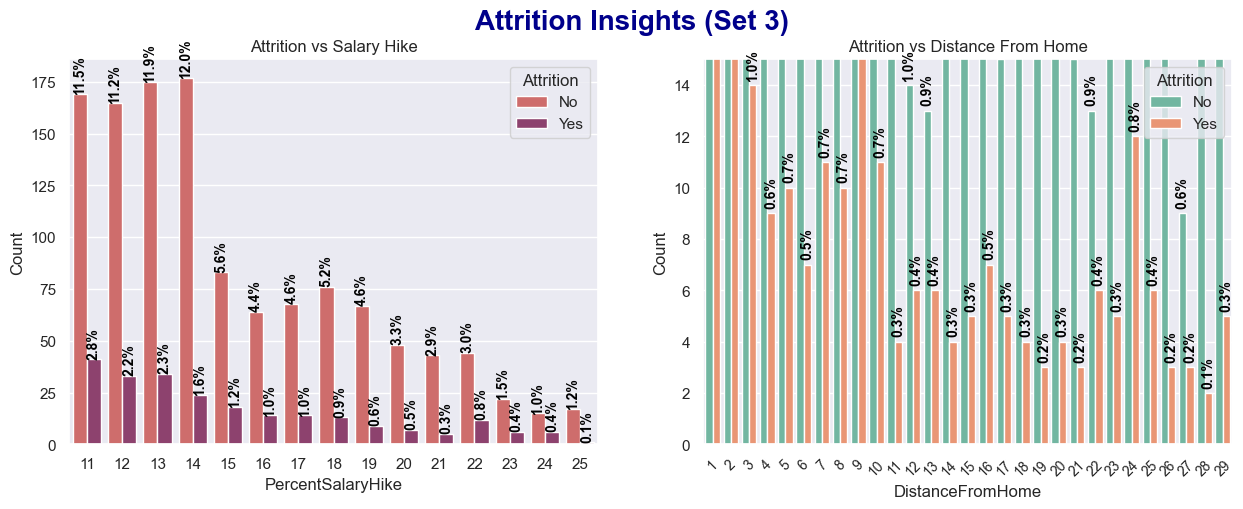

In [22]:
def plot_attrition_insights_3(df):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle("Attrition Insights (Set 3)", fontsize=20, fontweight='bold', color='darkblue')
    
    attrition_salary = df.groupby(['PercentSalaryHike', 'Attrition']).size().reset_index(name='Count')
    ax = sns.barplot(data=attrition_salary, x='PercentSalaryHike', y='Count', hue='Attrition', palette='flare', ax=axes[0])
    axes[0].set_title("Attrition vs Salary Hike")
    add_percentage(ax, attrition_salary['Count'].sum())
    
    attrition_distance = df.groupby(['DistanceFromHome', 'Attrition']).size().reset_index(name='Count')
    ax = sns.barplot(data=attrition_distance, x='DistanceFromHome', y='Count', hue='Attrition', palette='Set2', ax=axes[1])
    axes[1].set_title("Attrition vs Distance From Home")
    add_percentage(ax, attrition_distance['Count'].sum())
    axes[1].set_ylim(0, 15)
    axes[1].tick_params(axis='x', rotation=0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10)
    
    plt.show()

plot_attrition_insights_3(df)
